In [11]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc,rcParams
from numba import jit, types
from matplotlib import colors
from IPython import display
import pandas as pd
from mpl_toolkits import mplot3d
rc('font', weight='bold')
sns.set_palette(['steelblue', 'orange', 'indianred', 'seagreen'])

In [2]:
def cell_model(var, t, a, beta01, beta02, beta21, beta12, v1, v2):
    s = var[0]
    i1 = var[1]
    i2 = var[2]
    dsdt = a*s*(1 - s) - s*(beta01*i1 + beta02*i2) 
    di1dt = beta01*s*i1 + beta21*i1*i2 - beta12*i2*i1 - v1*i1
    di2dt = beta02*s*i2 + beta12*i2*i1 - beta21*i1*i2 - v2*i2
    
    return [dsdt, di1dt, di2dt]

In [3]:
def pub_line_plot(axis, x, y, tick_width, tick_size, line_width, label=None, color=None):

    axis.plot(x, y, linewidth = line_width, color=color, label=label)


    for axes in ['bottom', 'left']:
        axis.spines[axes].set_linewidth(2.5)
        axis.spines[axes].set_color('0.2')

    axis.spines['top'].set_visible(False)
    axis.spines['right'].set_visible(False)

    axis.tick_params(width = tick_width, color = '0.2', labelsize=tick_size, labelcolor='0.2')

    axis.set_xlabel(axis.get_xlabel(), fontsize = 14, weight = 'bold', color = '0.2')
    axis.set_ylabel(axis.get_ylabel(), fontsize = 14, weight = 'bold', color = '0.2')

In [4]:
def cell_model_timescale_sep(var, t, a, beta01, beta02, beta21, beta12, v1, v2):
    i1 = var[0]
    i2 = var[1]
    di1dt = beta01*(a*beta12 - a*beta21 + beta02*v1 - beta01*v2)/(a*beta12 - a*beta21)*i1 + beta21*i1*i2 - beta12*i2*i1 - v1*i1
    di2dt = beta02*(a*beta12 - a*beta21 + beta02*v1 - beta01*v2)/(a*beta12 - a*beta21)*i2 + beta12*i2*i1 - beta21*i1*i2 - v2*i2
    
    return [di1dt, di2dt]

## Figure 4.2

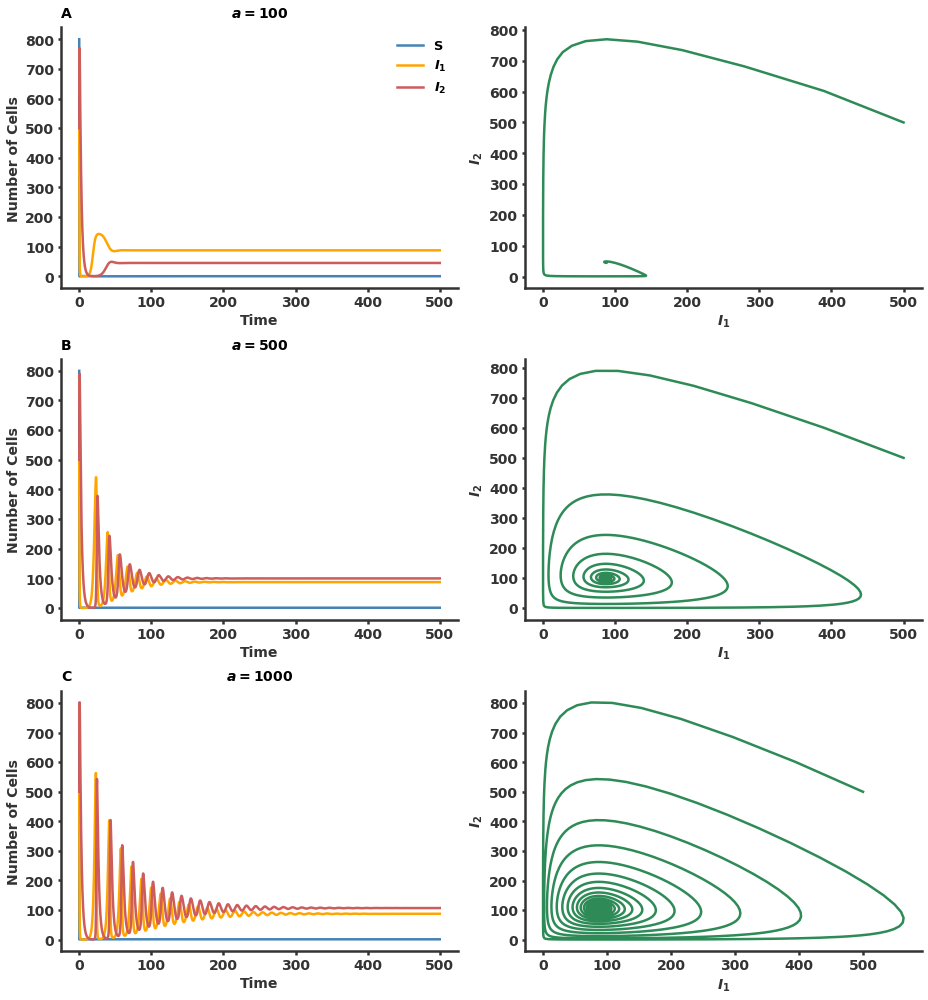

In [5]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize = (13, 14))

beta01 = 0.78*1610.488/2000
beta02 = 0.198*58.068/2000
beta21 = 0.017*1610.488/2000
beta12 = 0.647*58.068/2000
v1 = 100/2000
v2 = 900/2000
t = np.linspace(0, 500, 5000)
var = [800, 500, 500]

output = odeint(cell_model, var, t, args=(100, beta01, beta02, beta21, beta12, v1, v2))
s0 = output[:,0]
i1 = output[:,1]
i2 = output[:,2]


pub_line_plot(ax[0, 0], t, s0, 2.5, 14, 2.5, label='S')
pub_line_plot(ax[0, 0], t, i1, 2.5, 14, 2.5, label=r'$I_1$')
pub_line_plot(ax[0, 0], t, i2, 2.5, 14, 2.5, label=r'$I_2$')
ax[0, 0].set_title('A', loc='left', fontweight="bold", pad=10, size=14)
ax[0, 0].set_xlabel('Time')
ax[0, 0].set_ylabel('Number of Cells')
ax[0, 0].legend(frameon=False, prop={'size': 13})
ax[0, 0].set_title(r'$a = {0}$'.format(100), pad=10, size=14)
pub_line_plot(ax[0, 1], i1, i2, 2.5, 14, 2.5, color='seagreen')
ax[0, 1].set_xlabel(r'$I_1$')
ax[0, 1].set_ylabel(r'$I_2$')
sns.despine()

output = odeint(cell_model, var, t, args=(500, beta01, beta02, beta21, beta12, v1, v2))
s0 = output[:,0]
i1 = output[:,1]
i2 = output[:,2]


pub_line_plot(ax[1, 0], t, s0, 2.5, 14, 2.5)
pub_line_plot(ax[1, 0], t, i1, 2.5, 14, 2.5)
pub_line_plot(ax[1, 0], t, i2, 2.5, 14, 2.5)
ax[1, 0].set_title('B', loc='left', fontweight="bold", pad=10, size=14)
ax[1, 0].set_xlabel('Time')
ax[1, 0].set_ylabel('Number of Cells')
ax[1, 0].set_title(r'$a = {0}$'.format(500), pad=10, size=14)
#ax[1, 1].plot(i1, i2)
pub_line_plot(ax[1, 1], i1, i2, 2.5, 14, 2.5, color='seagreen')
#ax[1, 1].set_title('C', loc='left', fontweight="bold", pad=10)
ax[1, 1].set_xlabel(r'$I_1$')
ax[1, 1].set_ylabel(r'$I_2$')
sns.despine()

output = odeint(cell_model, var, t, args=(1000, beta01, beta02, beta21, beta12, v1, v2))
s0 = output[:,0]
i1 = output[:,1]
i2 = output[:,2]

pub_line_plot(ax[2, 0], t, s0, 2.5, 14, 2.5)
pub_line_plot(ax[2, 0], t, i1, 2.5, 14, 2.5)
pub_line_plot(ax[2, 0], t, i2, 2.5, 14, 2.5)
ax[2, 0].set_title('C', loc='left', fontweight="bold", pad=10, size=14)
ax[2, 0].set_xlabel('Time')
ax[2, 0].set_ylabel('Number of Cells')
ax[2, 0].set_title(r'$a = {0}$'.format(1000), pad=10, size=14)
pub_line_plot(ax[2, 1], i1, i2, 2.5, 14, 2.5, color='seagreen')
ax[2, 1].set_xlabel(r'$I_1$')
ax[2, 1].set_ylabel(r'$I_2$')
sns.despine()

fig.tight_layout()

## Figure 4.3

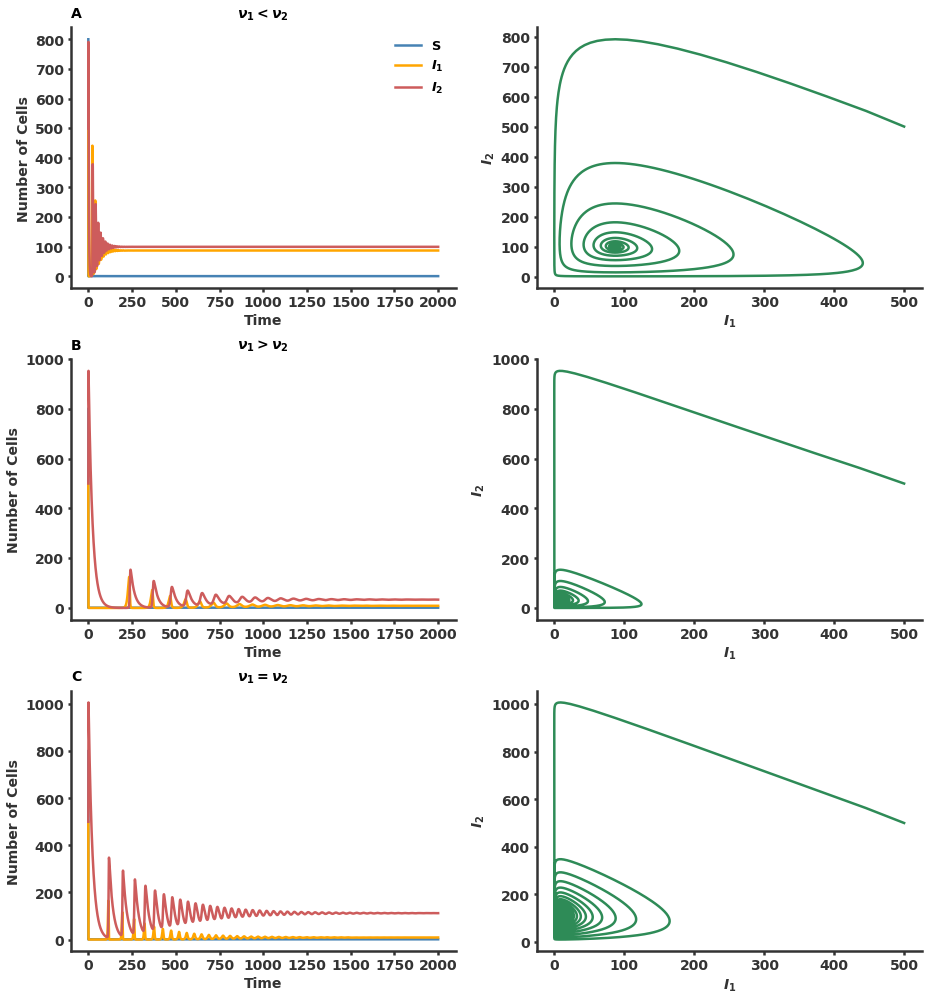

In [6]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize = (13, 14))

a = 500
beta01 = 0.78*1610.488/2000
beta02 = 0.198*58.068/2000
beta21 = 0.017*1610.488/2000
beta12 = 0.647*58.068/2000
v1 = 100/2000
v2 = 900/2000
t = np.linspace(0, 2000, 40000)
var = [800, 500, 500]

output = odeint(cell_model, var, t, args=(a, beta01, beta02, beta21, beta12, v1, v2))
s0 = output[:,0]
i1 = output[:,1]
i2 = output[:,2]

pub_line_plot(ax[0, 0], t, s0, 2.5, 14, 2.5, label='S')
pub_line_plot(ax[0, 0], t, i1, 2.5, 14, 2.5, label=r'$I_1$')
pub_line_plot(ax[0, 0], t, i2, 2.5, 14, 2.5, label=r'$I_2$')
ax[0, 0].set_title('A', loc='left', fontweight="bold", pad=10, size=14)
ax[0, 0].set_xlabel('Time')
ax[0, 0].set_ylabel('Number of Cells')
ax[0, 0].legend(frameon=False, prop={'size': 13})
ax[0, 0].set_title(r'$\nu_1 < \nu_2$', pad=10, size=14)
pub_line_plot(ax[0, 1], i1, i2, 2.5, 14, 2.5, color='seagreen')
ax[0, 1].set_xlabel(r'$I_1$')
ax[0, 1].set_ylabel(r'$I_2$')
sns.despine()

output = odeint(cell_model, var, t, args=(a, beta01, beta02, beta21, beta12, v2, v1))
s0 = output[:,0]
i1 = output[:,1]
i2 = output[:,2]


pub_line_plot(ax[1, 0], t, s0, 2.5, 14, 2.5)
pub_line_plot(ax[1, 0], t, i1, 2.5, 14, 2.5)
pub_line_plot(ax[1, 0], t, i2, 2.5, 14, 2.5)
ax[1, 0].set_title('B', loc='left', fontweight="bold", pad=10, size=14)
ax[1, 0].set_xlabel('Time')
ax[1, 0].set_ylabel('Number of Cells')
ax[1, 0].set_title(r'$\nu_1 > \nu_2$', pad=10, size=14)
pub_line_plot(ax[1, 1], i1, i2, 2.5, 14, 2.5, color='seagreen')
ax[1, 1].set_xlabel(r'$I_1$')
ax[1, 1].set_ylabel(r'$I_2$')
sns.despine()

output = odeint(cell_model, var, t, args=(a, beta01, beta02, beta21, beta12, v1, v1))
s0 = output[:,0]
i1 = output[:,1]
i2 = output[:,2]

pub_line_plot(ax[2, 0], t, s0, 2.5, 14, 2.5)
pub_line_plot(ax[2, 0], t, i1, 2.5, 14, 2.5)
pub_line_plot(ax[2, 0], t, i2, 2.5, 14, 2.5)
ax[2, 0].set_title('C', loc='left', fontweight="bold", pad=10, size=14)
ax[2, 0].set_xlabel('Time')
ax[2, 0].set_ylabel('Number of Cells')
ax[2, 0].set_title(r'$\nu_1 = \nu_2$', pad=10, size=14)
pub_line_plot(ax[2, 1], i1, i2, 2.5, 14, 2.5, color='seagreen')
ax[2, 1].set_xlabel(r'$I_1$')
ax[2, 1].set_ylabel(r'$I_2$')
sns.despine()

fig.tight_layout()

## Figure 4.4

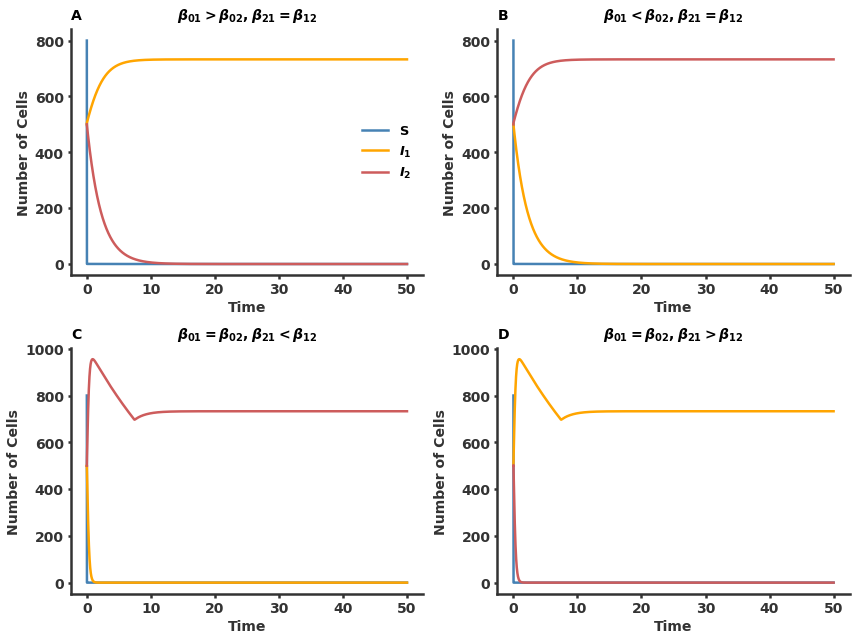

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (12, 9))

a = 500
beta01 = 0.78*1610.488/2000
beta02 = 0.198*58.068/2000
beta21 = 0.017*1610.488/2000
beta12 = 0.647*58.068/2000
v1 = 100/2000
v2 = 900/2000
t = np.linspace(0, 50, 40000)
var = [800, 500, 500]

output = odeint(cell_model, var, t, args=(a, beta01, beta02, beta12, beta12, v1, v2))
s0 = output[:,0]
i1 = output[:,1]
i2 = output[:,2]


pub_line_plot(ax[0, 0], t, s0, 2.5, 14, 2.5, label='S')
pub_line_plot(ax[0, 0], t, i1, 2.5, 14, 2.5, label=r'$I_1$')
pub_line_plot(ax[0, 0], t, i2, 2.5, 14, 2.5, label=r'$I_2$')
ax[0, 0].set_title('A', loc='left', fontweight="bold", pad=10, size=14)
ax[0, 0].set_xlabel('Time')
ax[0, 0].set_ylabel('Number of Cells')
ax[0, 0].legend(frameon=False, prop={'size': 13}, loc='center right')
ax[0, 0].set_title(r'$\beta_{01} > \beta_{02}, \beta_{21} = \beta_{12}$', pad=10, size=14)
sns.despine()

output = odeint(cell_model, var, t, args=(a, beta02, beta01, beta12, beta12, v2, v1))
s0 = output[:,0]
i1 = output[:,1]
i2 = output[:,2]

pub_line_plot(ax[0, 1], t, s0, 2.5, 14, 2.5)
pub_line_plot(ax[0, 1], t, i1, 2.5, 14, 2.5)
pub_line_plot(ax[0, 1], t, i2, 2.5, 14, 2.5)
ax[0, 1].set_title('B', loc='left', fontweight="bold", pad=10, size=14)
ax[0, 1].set_xlabel('Time')
ax[0, 1].set_ylabel('Number of Cells')
ax[0, 1].set_title(r'$\beta_{01} < \beta_{02}, \beta_{21} = \beta_{12}$', pad=10, size=14)
sns.despine()

output = odeint(cell_model, var, t, args=(a, beta01, beta01, beta21, beta12, v1, v1))
s0 = output[:,0]
i1 = output[:,1]
i2 = output[:,2]

pub_line_plot(ax[1, 0], t, s0, 2.5, 14, 2.5)
pub_line_plot(ax[1, 0], t, i1, 2.5, 14, 2.5)
pub_line_plot(ax[1, 0], t, i2, 2.5, 14, 2.5)
ax[1, 0].set_title('C', loc='left', fontweight="bold", pad=10, size=14)
ax[1, 0].set_xlabel('Time')
ax[1, 0].set_ylabel('Number of Cells')
ax[1, 0].set_title(r'$\beta_{01} = \beta_{02}, \beta_{21} < \beta_{12}$', pad=10, size=14)
sns.despine()

output = odeint(cell_model, var, t, args=(a, beta01, beta01, beta12, beta21, v1, v1))
s0 = output[:,0]
i1 = output[:,1]
i2 = output[:,2]

pub_line_plot(ax[1, 1], t, s0, 2.5, 14, 2.5)
pub_line_plot(ax[1, 1], t, i1, 2.5, 14, 2.5)
pub_line_plot(ax[1, 1], t, i2, 2.5, 14, 2.5)
ax[1, 1].set_title('D', loc='left', fontweight="bold", pad=10, size=14)
ax[1, 1].set_xlabel('Time')
ax[1, 1].set_ylabel('Number of Cells')
ax[1, 1].set_title(r'$\beta_{01} = \beta_{02}, \beta_{21} > \beta_{12}$', pad=10, size=14)
sns.despine()

fig.tight_layout()

In [9]:
beta01 = 0.78*1610.488/2000
beta02 = 0.198*58.068/2000
beta21 = 0.017*1610.488/2000
beta12 = 0.647*58.068/2000
v1 = 100/2000
v2 = 900/2000
t = np.linspace(0, 97, 5000)
a = 500
s_eq = (a*beta12 - a*beta21 + beta02*v1 - beta01*v2)/(a*beta12 - a*beta21)
var = [500, 500]


output = odeint(cell_model_timescale_sep, var, t, args=(a, beta01, beta02, beta21, beta12, v1, v2))
i1 = output[:,0]
i2 = output[:,1]

## Figure 4.5

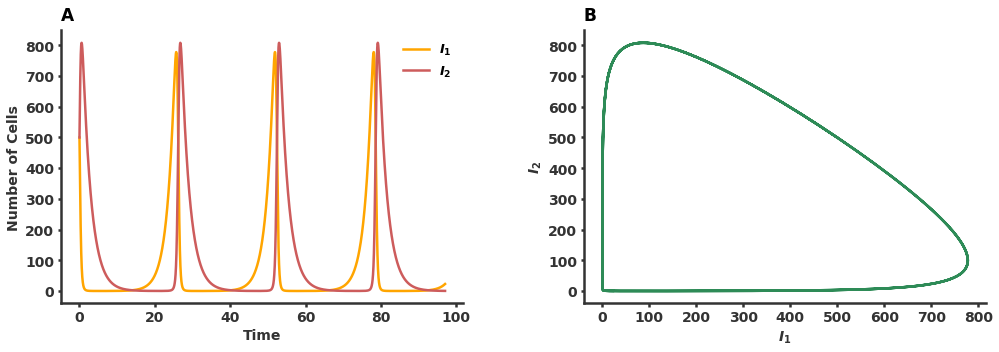

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (14, 5))

pub_line_plot(ax[0], t, i1, 2.5, 14, 2.5, label=r'$I_1$', color='orange')
pub_line_plot(ax[0], t, i2, 2.5, 14, 2.5, label=r'$I_2$', color='indianred')
ax[0].legend(frameon=False, prop={'size': 13})
ax[0].set_ylabel('Number of Cells')
ax[0].set_xlabel('Time')
ax[0].set_title('A', loc='left', fontweight="bold", pad=10, size=17)
sns.despine()

pub_line_plot(ax[1], i1, i2, 2.5, 14, 2.5, label=r'$I_2$', color='seagreen')
ax[1].set_ylabel(r'$I_2$')
ax[1].set_xlabel(r'$I_1$')
ax[1].set_title('B', loc='left', fontweight="bold", pad=10, size=17)
sns.despine()




fig.tight_layout()
plt.subplots_adjust(wspace = 0.3)

## Figure 4.11 - Three Strain ODE

In [15]:
def cell_model_three_strain(var, t, a, beta01, beta02, beta03, beta21, beta12, beta23, beta32, beat13, beta31, v1, v2, v3):
    s = var[0]
    i1 = var[1]
    i2 = var[2]
    i3 = var[3]
    dsdt = a*s*(1 - s) - s*(beta01*i1 + beta02*i2 + beta03*i3) 
    di1dt = beta01*s*i1 + beta21*i1*i2 + beta31*i3*i1 - beta12*i2*i1 - beta13*i1*i3 - v1*i1
    di2dt = beta02*s*i2 + beta12*i2*i1 + beta32*i3*i2 - beta21*i1*i2 - beta23*i2*i3 - v2*i2
    di3dt = beta03*s*i3 + beta23*i2*i3 + beta13*i3*i1 - beta32*i3*i2 - beta31*i3*i1 - v3*i3
    
    return [dsdt, di1dt, di2dt, di3dt]

In [16]:
beta01 = 0.78*1610.488/2000
beta02 = 0.198*58.068/2000
beta03 = 0.78*1610.488/2000
beta21 = 0.647*58.068/2000
beta12 = 0.017*1610.488/2000
beta23 = 0.017*1610.488/2000
beta32 = 0.647*58.068/2000
beta13 = 0.647*58.068/2000
beta31 = 0.017*1610.488/2000
v1 = 100/2000
v2 = 80/2000
v3 = 60/2000
t = np.linspace(0, 100, 5000)
var = [800, 500, 500, 500]

output = odeint(cell_model_three_strain, var, t, args=(700, beta01, beta02, beta03, beta21, beta12, beta23, beta32, beta13, beta31, v1, v2, v3))
s0 = output[:,0]
i1 = output[:,1]
i2 = output[:,2]
i3 = output[:,3]

In [17]:
def pub_3d_plot(axis, x, y, z, tick_width, tick_size, line_width, label=None, color=None):
    
    axis.plot3D(x, y, z, color)


    for axes in ['bottom', 'left']:
        axis.spines[axes].set_linewidth(2.5)
        axis.spines[axes].set_color('0.2')


    axis.tick_params(width = tick_width, color = '0.2', labelsize=tick_size, labelcolor='0.2')

    axis.set_xlabel(axis.get_xlabel(), fontsize = 14, weight = 'bold', color = '0.2')
    axis.set_ylabel(axis.get_ylabel(), fontsize = 14, weight = 'bold', color = '0.2')
    axis.set_zlabel(axis.get_zlabel(), fontsize = 14, weight = 'bold', color = '0.2')

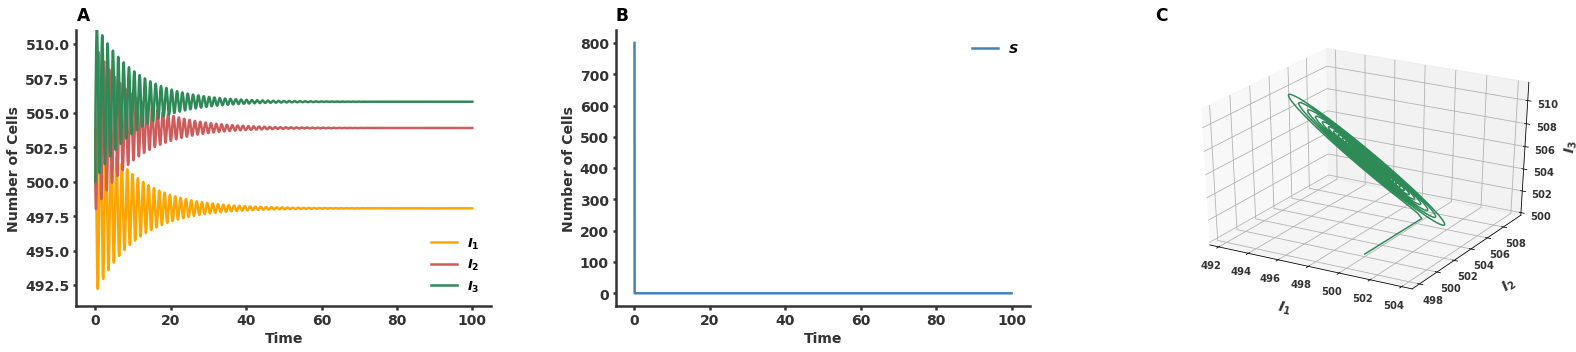

In [18]:
fig = plt.figure(figsize = (22, 5))

ax = fig.add_subplot(1, 3, 1)
#pub_line_plot(ax, t, s0, 2.5, 14, 2.5, label=r'$S$')
pub_line_plot(ax, t, i1, 2.5, 14, 2.5, label=r'$I_1$', color='orange')
pub_line_plot(ax, t, i2, 2.5, 14, 2.5, label=r'$I_2$', color='indianred')
pub_line_plot(ax, t, i3, 2.5, 14, 2.5, label=r'$I_3$', color='seagreen')
ax.legend(frameon=False, prop={'size': 13})
ax.set_ylabel('Number of Cells')
ax.set_xlabel('Time')
ax.set_ylim(491, 511)
ax.set_title('A', loc='left', fontweight="bold", pad=10, size=17)
sns.despine()

ax = fig.add_subplot(1, 3, 2)
pub_line_plot(ax, t, s0, 2.5, 14, 2.5, label=r'$S$', color='steelblue')
ax.legend(frameon=False, prop={'size': 13})
ax.set_ylabel('Number of Cells')
ax.set_xlabel('Time')
ax.set_title('B', loc='left', fontweight="bold", pad=10, size=17)
sns.despine()

ax = fig.add_subplot(1, 3, 3, projection='3d')
pub_3d_plot(ax, i1, i2, i3, 2.5, 10, 2.5, color='seagreen')
ax.set_zlabel(r'$I_3$', labelpad=6)
ax.set_ylabel(r'$I_2$', labelpad=15)
ax.set_xlabel(r'$I_1$', labelpad=15)
ax.set_title('C', loc='left', fontweight="bold", pad=10, size=17)
sns.despine()


fig.tight_layout()
plt.subplots_adjust(wspace = 0.3)